In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import MY_bcilib as mybci

In [2]:
epochs = mne.read_epochs('A01T_epo.fif')
left_data = epochs['769'].get_data()
right_data = epochs['770'].get_data()
foot_data = epochs['771'].get_data()
tongue_data = epochs['772'].get_data()

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\A01T_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    3500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated


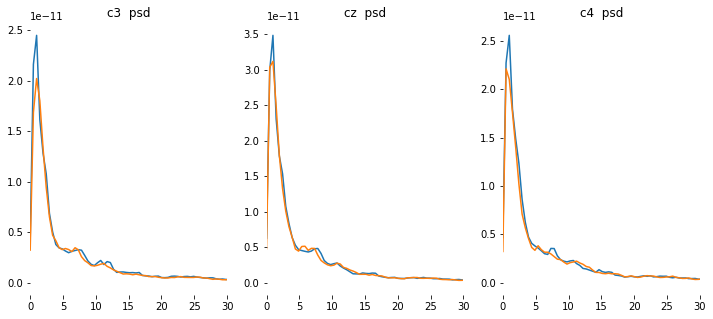

In [3]:
left_psd,freq = mybci.psd(left_data,NFFT=512,Fs=250)
right_psd,freq = mybci.psd(right_data,NFFT=512,Fs=250)
foot_psd,freq = mybci.psd(foot_data,NFFT=512,Fs=250)
tongue_psd,freq = mybci.psd(tongue_data,NFFT=512,Fs=250)

mybci.plot_psd(left_psd,right_psd,freq,['c3','cz','c4'],[7,9,11])

trials_filter shape  (72, 22, 1001)
trials_filter shape  (72, 22, 1001)
trials_filter shape  (72, 22, 1001)
trials_filter shape  (72, 22, 1001)


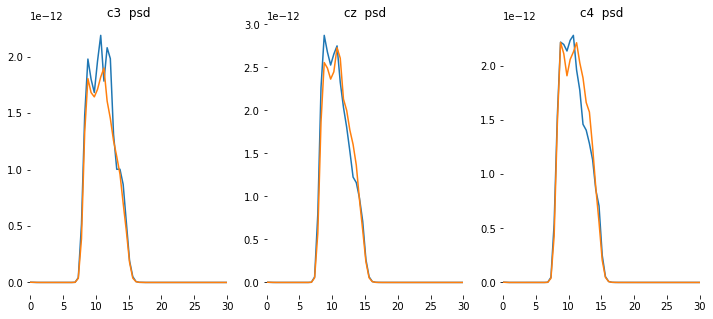

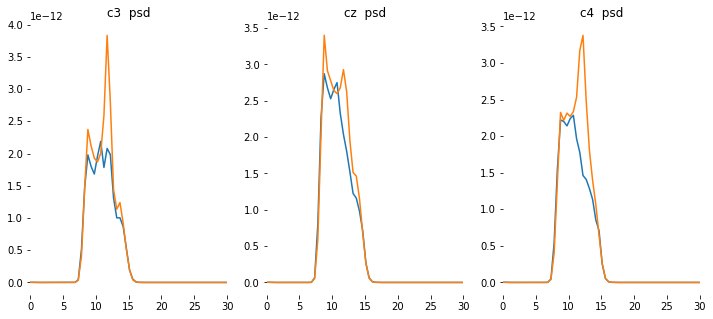

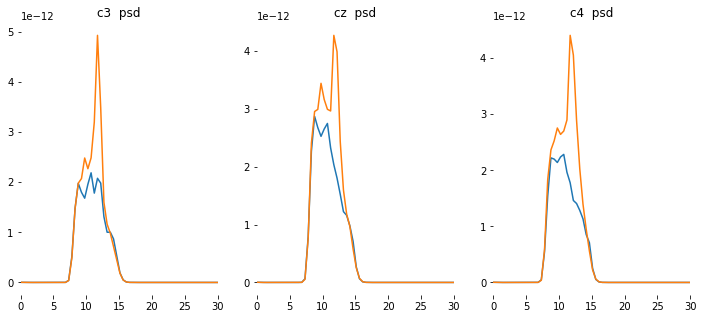

In [4]:
left_data_filt = mybci.band_pass(left_data,8,15,sample_rate=250)
right_data_filt = mybci.band_pass(right_data,8,15,sample_rate=250)
foot_data_filt = mybci.band_pass(foot_data,8,15,sample_rate=250)
tongue_data_filt = mybci.band_pass(tongue_data,8,15,sample_rate=250)

left_filt_psd,freq = mybci.psd(left_data_filt,NFFT=512,Fs=250)
right_filt_psd,freq = mybci.psd(right_data_filt,NFFT=512,Fs=250)
foot_filt_psd,freq = mybci.psd(foot_data_filt,NFFT=512,Fs=250)
tongue_filt_psd,freq = mybci.psd(tongue_data_filt,NFFT=512,Fs=250)

mybci.plot_psd(left_filt_psd,right_filt_psd,freq,['c3','cz','c4'],[7,9,11])
mybci.plot_psd(left_filt_psd,foot_filt_psd,freq,['c3','cz','c4'],[7,9,11])
mybci.plot_psd(left_filt_psd,tongue_filt_psd,freq,['c3','cz','c4'],[7,9,11])

### 使用CSP进行滤波

In [5]:
my_W = mybci.cal_W(left_data_filt,right_data_filt)

my_left_csp_data = mybci.apply_mix(my_W,left_data_filt)
my_right_csp_data = mybci.apply_mix(my_W,right_data_filt)

两类的特征值lambda:
 [0.68672262 0.65798869 0.5682242  0.5535257  0.54851038 0.54235729
 0.53293584 0.52221422 0.51285705 0.50388453 0.5019817  0.50118315
 0.49428688 0.48545069 0.4783453  0.47674827 0.46900874 0.45810361
 0.44642579 0.39325613 0.3898463  0.3481272 ]
Sb value is  [[ 0.5014882  -0.00897735  0.01066424 -0.01239076 -0.00794538  0.00693932]
 [-0.00897735  0.4721888  -0.052438    0.02009808  0.02931415 -0.08088225]
 [ 0.01066424 -0.052438    0.47580427  0.04398194 -0.00887798 -0.00621806]
 [-0.01239076  0.02009808  0.04398194  0.49529296 -0.00876071  0.01787705]
 [-0.00794538  0.02931415 -0.00887798 -0.00876071  0.50008171  0.01674636]
 [ 0.00693932 -0.08088225 -0.00621806  0.01787705  0.01674636  0.46051077]]
reverse Sb value is  [[ 0.5014882  -0.00897735  0.01066424 -0.01239076 -0.00794538  0.00693932]
 [-0.00897735  0.4721888  -0.052438    0.02009808  0.02931415 -0.08088225]
 [ 0.01066424 -0.052438    0.47580427  0.04398194 -0.00887798 -0.00621806]
 [-0.01239076  0.02009808  0

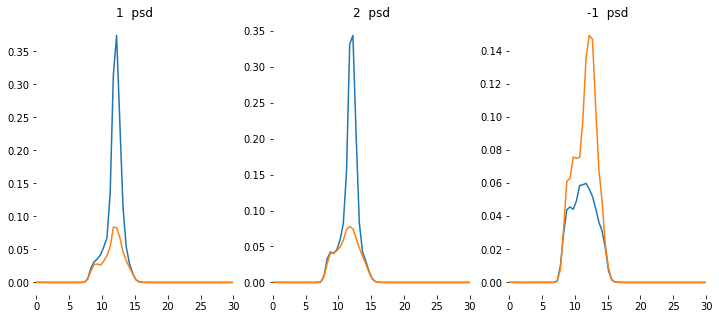

In [6]:
left_csp_filt_psd,freq = mybci.psd(my_left_csp_data,NFFT=512,Fs=250)
right_csp_filt_psd,freq = mybci.psd(my_right_csp_data,NFFT=512,Fs=250)

mybci.plot_psd(left_csp_filt_psd,right_csp_filt_psd,freq,['1','2','-1'],[0,1,-1])

(22,)
(22,)


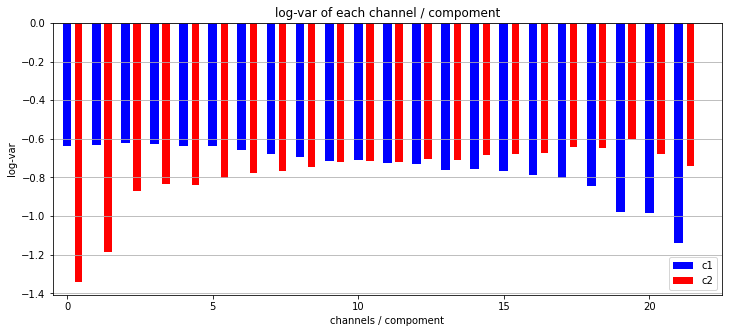

In [7]:
my_left_csp_var = mybci.logvar(my_left_csp_data)
my_right_csp_var = mybci.logvar(my_right_csp_data)
mybci.plot_logvar(my_left_csp_var,my_right_csp_var)

In [8]:
def cal_csp_feature(csp_var,fea_num):
    '''
    计算CSP投影后数据的方差,并将该方差归一化,以此作为CSP特征
    '''
    csp_fea = abs(csp_var[:,fea_num])
    csp_fea_norm =  csp_fea / np.sum(csp_fea,axis=1,keepdims=True)
    return csp_fea,csp_fea_norm
    
    

In [9]:
a,my_left_csp_fea = cal_csp_feature(my_left_csp_var,[0,1,-2,-1])
b,my_right_csp_var = cal_csp_feature(my_right_csp_var,[0,1,-2,-1])
print(a[0:10,:])
print(my_left_csp_fea[0:10,:])
print('-----------------------')
print(b[0:10,:])
print(my_right_csp_var[0:10,:])

[[0.72589941 0.74473584 1.36249732 1.20144666]
 [0.53576278 0.51387978 0.77400666 1.08858972]
 [0.63244495 0.74263964 1.00045143 0.86495873]
 [0.68095351 0.82769903 1.19189696 1.33967726]
 [0.49849542 0.18081751 0.91058324 0.26684711]
 [1.81149275 1.60739131 1.13241797 1.82170263]
 [1.89749517 1.12699025 0.48365602 0.70237075]
 [0.52901117 0.55191245 1.03362203 1.14878975]
 [1.17071348 1.28465794 1.44726294 1.07776411]
 [1.51248134 0.96712408 1.16765083 1.58569492]]
[[0.17991948 0.18458823 0.33770494 0.29778735]
 [0.18396938 0.17645523 0.26577718 0.37379822]
 [0.19516925 0.22917477 0.30873416 0.26692181]
 [0.16854339 0.2048645  0.29500744 0.33158467]
 [0.26847838 0.09738423 0.49041957 0.14371783]
 [0.28424469 0.25221876 0.17768981 0.28584674]
 [0.45065662 0.26766108 0.11486869 0.16681361]
 [0.16210751 0.16912526 0.31673791 0.35202932]
 [0.23506422 0.2579428  0.2905918  0.21640118]
 [0.28903028 0.18481428 0.22313429 0.30302116]]
-----------------------
[[0.27058706 0.5756546  0.46422094

left v.s. foot

In [10]:
my_W2 = mybci.cal_W(left_data_filt,foot_data_filt)

my_left_csp_data = mybci.apply_mix(my_W2,left_data_filt)
my_foot_csp_data = mybci.apply_mix(my_W2,foot_data_filt)

两类的特征值lambda:
 [0.57697389 0.53445802 0.53030093 0.52830207 0.51756563 0.51524135
 0.50422738 0.4932574  0.49198643 0.48894814 0.48427947 0.47834018
 0.46451775 0.45533425 0.44172147 0.42587264 0.41531541 0.3763499
 0.34515238 0.33239433 0.27404829 0.19736246]
Sb value is  [[ 0.52701216 -0.01471126 -0.00499362  0.00726649 -0.01185215  0.02383182]
 [-0.01471126  0.59718952 -0.01559657 -0.04852489 -0.01878291 -0.01248156]
 [-0.00499362 -0.01559657  0.64818652  0.02981342  0.03091339  0.02905919]
 [ 0.00726649 -0.04852489  0.02981342  0.58222331  0.01275862 -0.01287682]
 [-0.01185215 -0.01878291  0.03091339  0.01275862  0.58849223  0.03638229]
 [ 0.02383182 -0.01248156  0.02905919 -0.01287682  0.03638229  0.55258693]]
reverse Sb value is  [[ 0.52701216 -0.01471126 -0.00499362  0.00726649 -0.01185215  0.02383182]
 [-0.01471126  0.59718952 -0.01559657 -0.04852489 -0.01878291 -0.01248156]
 [-0.00499362 -0.01559657  0.64818652  0.02981342  0.03091339  0.02905919]
 [ 0.00726649 -0.04852489  0.

(22,)
(22,)


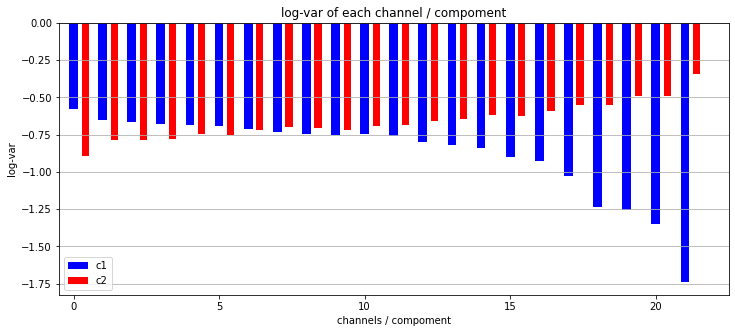

In [11]:
my_left_csp_var = mybci.logvar(my_left_csp_data)
my_foot_csp_var = mybci.logvar(my_foot_csp_data)
mybci.plot_logvar(my_left_csp_var,my_foot_csp_var)

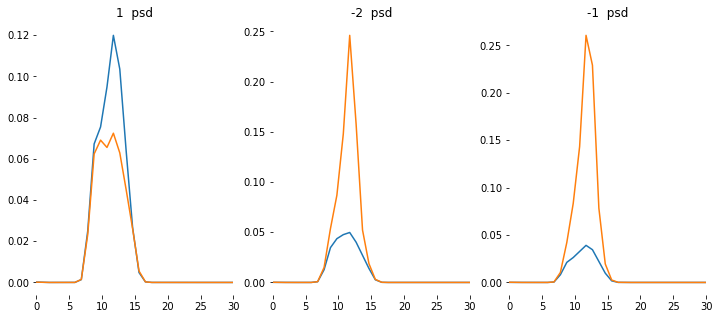

In [12]:
left_csp_filt_psd,freq = mybci.psd(my_left_csp_data,NFFT=256,Fs=250)
foot_csp_filt_psd,freq = mybci.psd(my_foot_csp_data,NFFT=256,Fs=250)

mybci.plot_psd(left_csp_filt_psd,foot_csp_filt_psd,freq,['1','-2','-1'],[0,-2,-1])

In [13]:
print(left_csp_filt_psd.shape)
print(left_csp_filt_psd[0,0,:])
print(freq)

(72, 22, 129)
[9.97045848e-05 4.71598268e-05 5.26728726e-08 1.41289017e-07
 4.57409646e-07 2.04552427e-06 1.99150149e-05 1.63483013e-03
 1.69073917e-02 2.84369911e-02 3.25183262e-02 3.15907728e-02
 4.84300815e-02 1.16304135e-01 1.02340865e-01 2.18563854e-02
 1.74854295e-03 3.47799730e-04 4.82739232e-06 9.36922259e-07
 2.06176618e-07 8.66071250e-08 3.74584620e-08 1.98555163e-08
 1.05309036e-08 6.31560990e-09 3.86368726e-09 2.47054838e-09
 1.63867216e-09 1.11599233e-09 7.81657039e-10 5.58607724e-10
 4.07271715e-10 3.02139301e-10 2.27681440e-10 1.73959101e-10
 1.34609898e-10 1.05363606e-10 8.33437731e-11 6.65607028e-11
 5.36315441e-11 4.35673535e-11 3.56604569e-11 2.93938431e-11
 2.43871918e-11 2.03564429e-11 1.70886794e-11 1.44220248e-11
 1.22322196e-11 1.04235828e-11 8.92152730e-12 7.66762542e-12
 6.61575822e-12 5.72927575e-12 4.97890298e-12 4.34109648e-12
 3.79682335e-12 3.33062571e-12 2.92987134e-12 2.58420035e-12
 2.28507146e-12 2.02541431e-12 1.79935159e-12 1.60197822e-12
 1.4291850

left v.s. tongue

In [14]:
my_W3 = mybci.cal_W(left_data_filt,tongue_data_filt)

my_left_csp_data = mybci.apply_mix(my_W3,left_data_filt)
my_tongue_csp_data = mybci.apply_mix(my_W3,tongue_data_filt)

两类的特征值lambda:
 [0.54038516 0.52469575 0.51951322 0.51922078 0.50556801 0.49636323
 0.49132646 0.4873606  0.47942831 0.47514902 0.46207132 0.45637956
 0.45418498 0.43294881 0.43042408 0.4152992  0.38449136 0.3421098
 0.26305832 0.25222134 0.22913224 0.14557254]
Sb value is  [[ 0.53709028 -0.00089166 -0.00296752 -0.0013484  -0.00333501  0.02123747]
 [-0.00089166  0.67231391  0.01944476 -0.05925371  0.01263136  0.02439752]
 [-0.00296752  0.01944476  0.69659475 -0.02510692  0.04427104 -0.03388532]
 [-0.0013484  -0.05925371 -0.02510692  0.64445084 -0.01575366 -0.01548109]
 [-0.00333501  0.01263136  0.04427104 -0.01575366  0.63216872 -0.03871689]
 [ 0.02123747  0.02439752 -0.03388532 -0.01548109 -0.03871689  0.59962093]]
reverse Sb value is  [[ 0.53709028 -0.00089166 -0.00296752 -0.0013484  -0.00333501  0.02123747]
 [-0.00089166  0.67231391  0.01944476 -0.05925371  0.01263136  0.02439752]
 [-0.00296752  0.01944476  0.69659475 -0.02510692  0.04427104 -0.03388532]
 [-0.0013484  -0.05925371 -0.

(22,)
(22,)


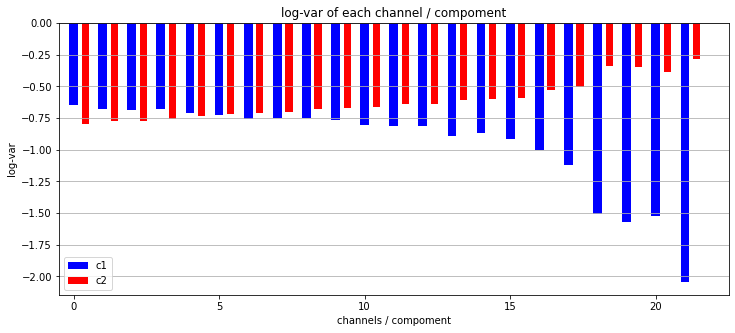

In [15]:
my_left_csp_var = mybci.logvar(my_left_csp_data)
my_tongue_csp_var = mybci.logvar(my_tongue_csp_data)
mybci.plot_logvar(my_left_csp_var,my_tongue_csp_var)

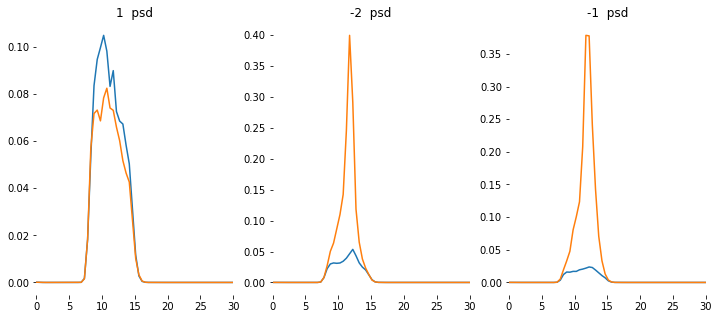

In [16]:
left_csp_filt_psd,freq = mybci.psd(my_left_csp_data,NFFT=512,Fs=250)
tongue_csp_filt_psd,freq = mybci.psd(my_tongue_csp_data,NFFT=512,Fs=250)

mybci.plot_psd(left_csp_filt_psd,tongue_csp_filt_psd,freq,['1','-2','-1'],[0,-2,-1])

### 切分数据集

In [17]:
all_data = np.zeros((4,72,22,left_data_filt.shape[2]))
train_idx = list(range(0,50))
test_idx = list(range(50,72))
train_left_data = left_data_filt[train_idx,:,:]
train_right_data = right_data_filt[train_idx,:,:]
train_foot_data = foot_data_filt[train_idx,:,:]
train_tongue_data = tongue_data_filt[train_idx,:,:]

test_left_data = left_data_filt[test_idx,:,:]
test_right_data = right_data_filt[test_idx,:,:]
test_foot_data = foot_data_filt[test_idx,:,:]
test_tongue_data = tongue_data_filt[test_idx,:,:]


train_data = np.concatenate((train_left_data,train_right_data))
train_data = np.concatenate((train_data,train_foot_data))
train_data = np.concatenate((train_data,train_tongue_data))

test_data = np.concatenate((test_left_data,test_right_data))
test_data = np.concatenate((test_data,test_foot_data))
test_data = np.concatenate((test_data,test_tongue_data))

test_label = np.concatenate((np.zeros((len(test_idx),)),np.ones((len(test_idx)))))
test_label = np.concatenate((test_label,2*np.ones((len(test_idx)))))
test_label = np.concatenate((test_label,3*np.ones((len(test_idx)))))

print('train data shape :',train_data.shape)
print('test data shape :',test_data.shape)
print('test label shape :',test_label.shape)
print('test label data :\n',test_label)

train data shape : (200, 22, 1001)
test data shape : (88, 22, 1001)
test label shape : (88,)
test label data :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


### 四分类 one v.s. one 推广到四分类  
共训练六个分类器，分类次数最多的作为分类结果

两类的特征值lambda:
 [0.70214898 0.67845188 0.58982949 0.56634701 0.55973451 0.5497677
 0.54060195 0.52857485 0.51866505 0.51681419 0.50838496 0.50237697
 0.49850292 0.49046527 0.48892603 0.48015597 0.46846353 0.46432859
 0.45045204 0.40635256 0.40234183 0.34373666]
Sb value is  [[ 0.48576408 -0.00513443  0.01382247 -0.01395361 -0.00649928 -0.00156785]
 [-0.00513443  0.44666104 -0.04244241  0.02349547  0.02446183 -0.08384925]
 [ 0.01382247 -0.04244241  0.45481298  0.04331898 -0.00995729 -0.01348509]
 [-0.01395361  0.02349547  0.04331898  0.4805032  -0.00451109  0.01373954]
 [-0.00649928  0.02446183 -0.00995729 -0.00451109  0.48838644  0.01424623]
 [-0.00156785 -0.08384925 -0.01348509  0.01373954  0.01424623  0.45491093]]
reverse Sb value is  [[ 0.48576408 -0.00513443  0.01382247 -0.01395361 -0.00649928 -0.00156785]
 [-0.00513443  0.44666104 -0.04244241  0.02349547  0.02446183 -0.08384925]
 [ 0.01382247 -0.04244241  0.45481298  0.04331898 -0.00995729 -0.01348509]
 [-0.01395361  0.02349547  0.

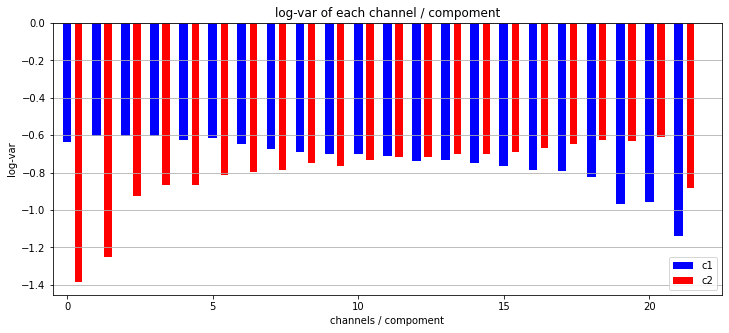

In [18]:
# left v.s. right
W1 = mybci.cal_W(train_left_data,train_right_data)
csp1_left_data = mybci.apply_mix(W1,train_left_data)
csp1_right_data = mybci.apply_mix(W1,train_right_data)


csp1_left_var = mybci.logvar(csp1_left_data)
csp1_right_var = mybci.logvar(csp1_right_data)
mybci.plot_logvar(csp1_left_var,csp1_right_var)


# left v.s. foot
W2 = mybci.cal_W(train_left_data,train_foot_data)
csp2_left_data = mybci.apply_mix(W2,train_left_data)
csp2_foot_data = mybci.apply_mix(W2,train_foot_data)

# left v.s. togue
W3 = mybci.cal_W(train_left_data,train_tongue_data)
csp3_left_data = mybci.apply_mix(W3,train_left_data)
csp3_tongue_data = mybci.apply_mix(W3,train_tongue_data)

# right v.s. foot
W4 = mybci.cal_W(train_right_data,train_foot_data)
csp4_right_data = mybci.apply_mix(W4,train_right_data)
csp4_foot_data = mybci.apply_mix(W4,train_foot_data)

# right v.s. tongue
W5 = mybci.cal_W(train_right_data,train_tongue_data)
csp5_right_data = mybci.apply_mix(W5,train_right_data)
csp5_tongue_data = mybci.apply_mix(W5,train_tongue_data)

# foot v.s. tongue
W6 = mybci.cal_W(train_foot_data,train_tongue_data)
csp6_foot_data = mybci.apply_mix(W6,train_foot_data)
csp6_tongue_data = mybci.apply_mix(W6,train_tongue_data)


In [19]:
select_component = [0,-1]

csp1_left_psd,freq = mybci.psd(csp1_left_data,NFFT=256,Fs=250)
csp1_right_psd,freq = mybci.psd(csp1_right_data,NFFT=256,Fs=250)
csp1_left_psd = csp1_left_psd[:,select_component,8:15]
csp1_right_psd = csp1_right_psd[:,select_component,8:15]
csp1_left_psd = np.mean(csp1_left_psd,axis=2)
csp1_right_psd = np.mean(csp1_right_psd,axis=2)



csp2_left_psd,freq = mybci.psd(csp2_left_data,NFFT=256,Fs=250)
csp2_foot_psd,freq = mybci.psd(csp2_foot_data,NFFT=256,Fs=250)
csp2_left_psd = csp2_left_psd[:,select_component,8:15]
csp2_foot_psd = csp2_foot_psd[:,select_component,8:15]
csp2_left_psd = np.mean(csp2_left_psd,axis=2)
csp2_foot_psd = np.mean(csp2_foot_psd,axis=2)



csp3_left_psd,freq = mybci.psd(csp3_left_data,NFFT=256,Fs=250)
csp3_tongue_psd,freq = mybci.psd(csp3_tongue_data,NFFT=256,Fs=250)
csp3_left_psd = csp3_left_psd[:,select_component,8:15]
csp3_tongue_psd = csp3_tongue_psd[:,select_component,8:15]
csp3_left_psd = np.mean(csp3_left_psd,axis=2)
csp3_tongue_psd = np.mean(csp3_tongue_psd,axis=2)


csp4_right_psd,freq = mybci.psd(csp4_right_data,NFFT=256,Fs=250)
csp4_foot_psd,freq = mybci.psd(csp4_foot_data,NFFT=256,Fs=250)
csp4_right_psd = csp4_right_psd[:,select_component,8:15]
csp4_foot_psd = csp4_foot_psd[:,select_component,8:15]
csp4_right_psd = np.mean(csp4_right_psd,axis=2)
csp4_foot_psd = np.mean(csp4_foot_psd,axis=2)

csp5_right_psd,freq = mybci.psd(csp5_right_data,NFFT=256,Fs=250)
csp5_tongue_psd,freq = mybci.psd(csp5_tongue_data,NFFT=256,Fs=250)
csp5_right_psd = csp5_right_psd[:,select_component,8:15]
csp5_tongue_psd = csp5_tongue_psd[:,select_component,8:15]
csp5_right_psd = np.mean(csp5_right_psd,axis=2)
csp5_tongue_psd = np.mean(csp5_tongue_psd,axis=2)


csp6_foot_psd,freq = mybci.psd(csp6_foot_data,NFFT=256,Fs=250)
csp6_tongue_psd,freq = mybci.psd(csp6_tongue_data,NFFT=256,Fs=250)
csp6_foot_psd = csp6_foot_psd[:,select_component,8:15]
csp6_tongue_psd = csp6_tongue_psd[:,select_component,8:15]
csp6_foot_psd = np.mean(csp6_foot_psd,axis=2)
csp6_tongue_psd = np.mean(csp6_tongue_psd,axis=2)

### 提取相应的CSP特征进行训练

In [20]:
from sklearn.svm import SVC


In [21]:
print(csp1_left_psd.shape)
print(csp4_right_psd.shape)
print(csp4_foot_psd.shape)
print(csp6_foot_psd.shape)
print(csp6_tongue_psd.shape)

(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)


In [22]:
permu = np.random.permutation(100)

print(permu)

[46  8 10 91 49 12 80 11 60 35  6 28 22 63 16  0 20 23 90 83 66 89 47  2
 94 95 54 33 70 98 59 32 88 38 68 24 17 71  4 65 86 34 15 37 55 53 29 84
  9 61  5 85 42 27 31 99 25 77 51 78 57 45 76 43  3 79 18 21 69 81 73 30
 82 41  1 96 64 19 74 40 93  7 75 39 97 13 14 36 87 62 58 56 72 26 44 67
 52 48 92 50]


In [23]:
clf1 = SVC(gamma='auto')

csp1_left_var = mybci.logvar(csp1_left_data)
csp1_right_var = mybci.logvar(csp1_right_data)
_ , csp1_left_fea = mybci.cal_csp_feature(csp1_left_var,[0,1,-2,-1])
_ , csp1_right_fea = mybci.cal_csp_feature(csp1_right_var,[0,1,-2,-1])


csp1_csp = np.concatenate((csp1_left_fea,csp1_right_fea))
csp1_psd = np.concatenate((csp1_left_psd,csp1_right_psd)) * 2

csp1_train_data = np.concatenate((csp1_csp,csp1_psd),axis=1)

#csp1_train_data = csp1_psd
#csp1_train_data = csp1_train_data[permu,:]

csp1_train_label = np.concatenate((np.zeros((csp1_left_fea.shape[0],)),np.ones((csp1_right_fea.shape[0],))))
#csp1_train_label = csp1_train_label[permu]

clf1.fit(csp1_train_data,csp1_train_label)

print(clf1.predict(csp1_train_data))

acc = 1 - np.sum(abs(clf1.predict(csp1_train_data) - csp1_train_label)) / csp1_train_data.shape[0]
print(acc)



[0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1.]
0.74


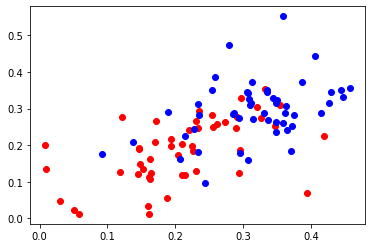

In [24]:
plt.scatter(csp1_train_data[0:50,0],csp1_train_data[0:50,1],c = 'r')
plt.scatter(csp1_train_data[50:100,0],csp1_train_data[50:100,1],c = 'b')

In [25]:
clf2 = SVC(gamma='auto',decision_function_shape='ovo')

csp2_left_var = mybci.logvar(csp2_left_data)
csp2_foot_var = mybci.logvar(csp2_foot_data)
_ , csp2_left_fea = mybci.cal_csp_feature(csp2_left_var,[0,1,-2,-1])
_ , csp2_foot_fea = mybci.cal_csp_feature(csp2_foot_var,[0,1,-2,-1])

csp2_csp = np.concatenate((csp2_left_fea,csp2_foot_fea))
csp2_psd = np.concatenate((csp2_left_psd,csp2_foot_psd)) * 2

csp2_train_data = np.concatenate((csp2_csp,csp2_psd),axis=1)
print(csp2_train_data.shape)

#csp2_train_data = csp2_psd
csp2_train_data = csp2_train_data[permu,:]

csp2_train_label = np.concatenate((np.zeros((csp2_left_fea.shape[0],)),2*np.ones((csp2_left_fea.shape[0],))))
csp2_train_label = csp2_train_label[permu]

clf2.fit(csp2_train_data,csp2_train_label)

print(clf2.predict(csp2_train_data))

acc = 1 - np.sum(abs(clf2.predict(csp2_train_data) - csp2_train_label)/2) / csp2_train_data.shape[0]
print(acc)

(100, 6)
[0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 2. 2. 0. 0.
 2. 2. 0. 0. 2. 2. 0. 0. 0. 0. 2. 0. 0. 2. 0. 2. 2. 0. 0. 0. 0. 2. 0. 2.
 0. 2. 0. 2. 0. 0. 0. 2. 0. 0. 2. 2. 0. 0. 2. 0. 0. 0. 0. 0. 2. 2. 2. 0.
 2. 0. 0. 2. 2. 0. 0. 0. 2. 0. 2. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0.
 2. 0. 2. 2.]
0.85


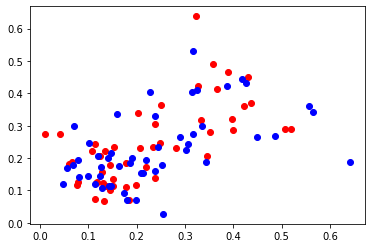

In [26]:
plt.scatter(csp2_train_data[0:50,0],csp2_train_data[0:50,1],c = 'r')
plt.scatter(csp2_train_data[50:100,0],csp2_train_data[50:100,1],c = 'b')

In [27]:
clf3 = SVC(gamma='auto')

csp3_left_var = mybci.logvar(csp3_left_data)
csp3_foot_var = mybci.logvar(csp3_tongue_data)
_ , csp3_left_fea = mybci.cal_csp_feature(csp3_left_var,[0,1,-2,-1])
_ , csp3_tongue_fea = mybci.cal_csp_feature(csp3_foot_var,[0,1,-2,-1])

csp3_csp = np.concatenate((csp3_left_fea,csp3_tongue_fea))
csp3_psd = np.concatenate((csp3_left_psd,csp3_tongue_psd)) * 2

csp3_train_data = np.concatenate((csp3_csp,csp3_psd),axis=1)

#csp3_train_data = csp3_psd


csp3_train_label = np.concatenate((np.zeros((csp3_left_fea.shape[0],)),3*np.ones((csp3_left_fea.shape[0],))))


clf3.fit(csp3_train_data,csp3_train_label)

print(clf3.predict(csp3_train_data))

acc = 1 - np.sum(abs(clf3.predict(csp3_train_data) - csp3_train_label)/3) / csp3_train_data.shape[0]
print(acc)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 3. 3. 3. 0. 0. 3. 0. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 3. 3. 3.
 3. 0. 0. 3. 3. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3. 3. 3. 0. 0. 3. 0. 3. 3. 3.
 3. 3. 3. 3.]
0.88


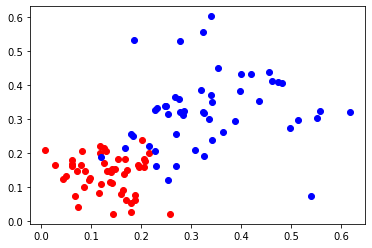

In [28]:
plt.scatter(csp3_train_data[0:50,0],csp3_train_data[0:50,1],c = 'r')
plt.scatter(csp3_train_data[50:100,0],csp3_train_data[50:100,1],c = 'b')

In [29]:
clf4 = SVC(gamma='auto',max_iter = 1000,decision_function_shape='ovo')

csp4_right_var = mybci.logvar(csp4_right_data)
csp4_foot_var = mybci.logvar(csp4_foot_data)
_ , csp4_right_fea = mybci.cal_csp_feature(csp4_right_var,[0,1,-2,-1])
_ , csp4_foot_fea = mybci.cal_csp_feature(csp4_foot_var,[0,1,-2,-1])

csp4_csp = np.concatenate((csp4_right_fea,csp4_foot_fea))
csp4_psd = np.concatenate((csp4_right_psd,csp4_foot_psd)) * 2

csp4_train_data = np.concatenate((csp4_csp,csp4_psd),axis=1)

#csp4_train_data = csp4_psd


csp4_train_label = np.concatenate((1*np.ones((csp4_right_fea.shape[0],)),2*np.ones((csp4_right_fea.shape[0],))))


clf4.fit(csp4_train_data,csp4_train_label)

print(clf4.predict(csp4_train_data))

acc = 1 - np.sum(abs(clf4.predict(csp4_train_data) - csp4_train_label)) / csp4_train_data.shape[0]
print(acc)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2.
 1. 1. 2. 2.]
0.89


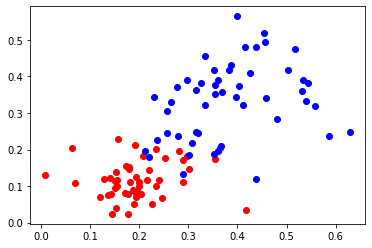

In [30]:
plt.scatter(csp4_train_data[0:50,0],csp4_train_data[0:50,1],c = 'r')
plt.scatter(csp4_train_data[50:100,0],csp4_train_data[50:100,1],c = 'b')

In [31]:
clf5 = SVC(gamma='auto',max_iter = 1000,decision_function_shape='ovo')

csp5_right_var = mybci.logvar(csp5_right_data)
csp5_tongue_var = mybci.logvar(csp5_tongue_data)
_ , csp5_right_fea = mybci.cal_csp_feature(csp5_right_var,[0,1,-2,-1])
_ , csp5_tongue_fea = mybci.cal_csp_feature(csp5_tongue_var,[0,1,-2,-1])

csp5_csp = np.concatenate((csp5_right_fea,csp5_tongue_fea))
csp5_psd = np.concatenate((csp5_right_psd,csp5_tongue_psd)) * 2

csp5_train_data = np.concatenate((csp5_csp,csp5_psd),axis=1)

#csp5_train_data = csp5_psd


csp5_train_label = np.concatenate((1*np.ones((csp5_right_fea.shape[0],)),3*np.ones((csp5_right_fea.shape[0],))))

clf5.fit(csp5_train_data,csp5_train_label)

print(clf5.predict(csp5_train_data))

acc = 1 - np.sum(abs(clf5.predict(csp5_train_data) - csp5_train_label)/2) / csp5_train_data.shape[0]
print(acc)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 3. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3.]
0.99


In [32]:
clf6 = SVC(gamma='auto',max_iter = 1000,decision_function_shape='ovo')

csp6_foot_var = mybci.logvar(csp6_foot_data)
csp6_tongue_var = mybci.logvar(csp6_tongue_data)
_ , csp6_foot_fea = mybci.cal_csp_feature(csp6_foot_var,[0,1,-2,-1])
_ , csp6_tongue_fea = mybci.cal_csp_feature(csp6_tongue_var,[0,1,-2,-1])


csp6_csp = np.concatenate((csp6_foot_fea,csp6_tongue_fea))
csp6_psd = np.concatenate((csp6_foot_psd,csp6_tongue_psd)) * 2

csp6_train_data = np.concatenate((csp6_csp,csp6_psd),axis=1)

#csp6_train_data = csp6_psd


csp6_train_label = np.concatenate((2*np.ones((csp6_foot_fea.shape[0],)),3*np.ones((csp6_foot_fea.shape[0],))))


clf6.fit(csp6_train_data,csp6_train_label)

print(clf6.predict(csp6_train_data))

acc = 1 - np.sum(abs(clf6.predict(csp6_train_data) - csp6_train_label)) / csp6_train_data.shape[0]
print(acc)

[2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 3. 3. 3. 3. 3. 3. 2. 2. 3. 3. 3. 3.
 2. 3. 3. 3.]
0.9


### 获取测试集数据CSP特征以及预测准确率
先在6个分类器上面分别提取CSP特征，然后送入单独的分类器做分类

In [33]:
_,test_csp1 = mybci.cal_csp_feature(mybci.logvar(mybci.apply_mix(W1,test_data)),[0,1,-2,-1])
_,test_csp2 = mybci.cal_csp_feature(mybci.logvar(mybci.apply_mix(W2,test_data)),[0,1,-2,-1])
_,test_csp3 = mybci.cal_csp_feature(mybci.logvar(mybci.apply_mix(W3,test_data)),[0,1,-2,-1])
_,test_csp4 = mybci.cal_csp_feature(mybci.logvar(mybci.apply_mix(W4,test_data)),[0,1,-2,-1])
_,test_csp5 = mybci.cal_csp_feature(mybci.logvar(mybci.apply_mix(W5,test_data)),[0,1,-2,-1])
_,test_csp6 = mybci.cal_csp_feature(mybci.logvar(mybci.apply_mix(W6,test_data)),[0,1,-2,-1])

#### 提取PSD特征

In [34]:
test_psd1,freq = mybci.psd(mybci.apply_mix(W1,test_data),NFFT=512,Fs=250)
test_psd1 = test_psd1[:,select_component,16:30]
test_psd1 = np.mean(test_psd1,axis=2) * 2

test_psd2,freq = mybci.psd(mybci.apply_mix(W2,test_data),NFFT=512,Fs=250)
test_psd2 = test_psd2[:,select_component,16:30]
test_psd2 = np.mean(test_psd2,axis=2) * 2

test_psd3,freq = mybci.psd(mybci.apply_mix(W3,test_data),NFFT=512,Fs=250)
test_psd3 = test_psd3[:,select_component,16:30]
test_psd3 = np.mean(test_psd3,axis=2) * 2

test_psd4,freq = mybci.psd(mybci.apply_mix(W4,test_data),NFFT=512,Fs=250)
test_psd4 = test_psd4[:,select_component,16:30]
test_psd4 = np.mean(test_psd4,axis=2) * 2

test_psd5,freq = mybci.psd(mybci.apply_mix(W5,test_data),NFFT=512,Fs=250)
test_psd5 = test_psd5[:,select_component,16:30]
test_psd5 = np.mean(test_psd5,axis=2) * 2

test_psd6,freq = mybci.psd(mybci.apply_mix(W6,test_data),NFFT=512,Fs=250)
test_psd6 = test_psd6[:,select_component,16:30]
test_psd6 = np.mean(test_psd6,axis=2) * 2

In [35]:
print(test_csp1.shape)
print(test_psd1.shape)

(88, 4)
(88, 2)


In [36]:
test_csp1 = np.concatenate((test_csp1,test_psd1),axis=1)
test_csp2 = np.concatenate((test_csp2,test_psd2),axis=1)
test_csp3 = np.concatenate((test_csp3,test_psd3),axis=1)
test_csp4 = np.concatenate((test_csp4,test_psd4),axis=1)
test_csp5 = np.concatenate((test_csp5,test_psd5),axis=1)
test_csp6 = np.concatenate((test_csp6,test_psd6),axis=1)

In [37]:
'''
test_csp1 = test_psd1
test_csp2 = test_psd2
test_csp3 = test_psd3
test_csp4 = test_psd4
test_csp5 = test_psd5
test_csp6 = test_psd6
'''

'\ntest_csp1 = test_psd1\ntest_csp2 = test_psd2\ntest_csp3 = test_psd3\ntest_csp4 = test_psd4\ntest_csp5 = test_psd5\ntest_csp6 = test_psd6\n'

In [38]:
print(test_csp1.shape)

(88, 6)


In [39]:
clf1_pred = clf1.predict(test_csp1)
clf2_pred = clf2.predict(test_csp2)
clf3_pred = clf3.predict(test_csp3)
clf4_pred = clf4.predict(test_csp4)
clf5_pred = clf5.predict(test_csp5)
clf6_pred = clf6.predict(test_csp6)

In [40]:
print(clf1_pred)
print(clf2_pred)
print(clf3_pred)
print(clf4_pred)
print(clf5_pred)
print(clf6_pred)


[1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2.
 2. 0. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 0. 2.
 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.
 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 0. 0.
 3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 3. 0. 0. 3. 3. 0. 0. 0. 3. 3. 3. 0. 0. 3.
 3. 3. 3. 3. 3. 3. 0. 3. 3. 0. 3. 0. 3. 3. 3. 3.]
[1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1.
 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1

In [41]:
clf_pred = np.zeros((6,len(clf1_pred)))

clf_pred[0,:] = clf1_pred
clf_pred[1,:] = clf2_pred
clf_pred[2,:] = clf3_pred
clf_pred[3,:] = clf4_pred
clf_pred[4,:] = clf5_pred
clf_pred[5,:] = clf6_pred
print(clf_pred)

[[1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
  2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2.
  2. 0. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 0. 2.
  2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.
  3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 0. 0.
  3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 3. 0. 0. 3. 3. 0. 0. 0. 3. 3. 3. 0. 0. 3.
  3. 3. 3. 3. 3. 3. 0. 3. 3. 0. 3. 0. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1.
  1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1.
  2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2

In [42]:
from collections import Counter

array = [0,1,2,2,3,4,4,4,5,6]
print()
#Counter({4: 3, 2: 2, 0: 1, 1: 1, 3: 1, 5: 1, 6: 1})
print(Counter(array).most_common(1)[0][0])


4


In [43]:
pred = []
for i in range(len(clf1_pred)):
    one_pred = clf_pred[:,i]
    pre = Counter(one_pred).most_common(1)[0][0]
    pred.append(pre)
print(pred)

[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0.0, 2.0, 2.0, 0.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 3.0, 2.0, 2.0, 3.0, 3.0, 1.0, 3.0, 0.0, 2.0, 3.0, 0.0, 3.0, 0.0, 3.0, 3.0, 2.0, 2.0]


In [44]:
err_cnt = 0
for i in range(len(pred)):
    if pred[i] != test_label[i]:
        err_cnt += 1
acc = 1 - err_cnt / len(pred)
print(acc)
    

0.6136363636363636


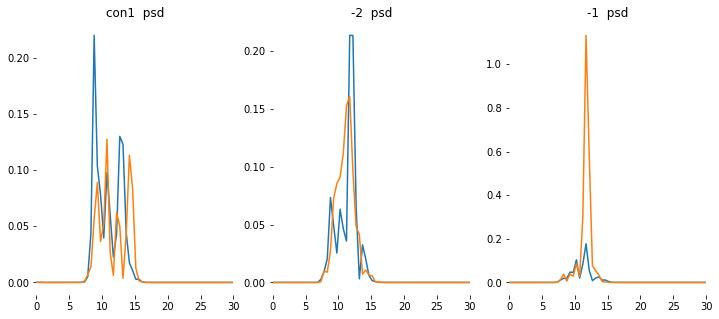

In [45]:
#显示 foot v.s. tongue
foot_psd,freq = mybci.psd(csp6_foot_data,NFFT=512,Fs=250)
tongue_psd,freq = mybci.psd(csp6_tongue_data,NFFT=512,Fs=250)

mybci.plot_psd(foot_psd[22:23,:,:],tongue_psd[22:23,:,:],freq,ch_names=['con1','-2','-1'],ch_idx=[0,-2,-1])

(22,)
(22,)


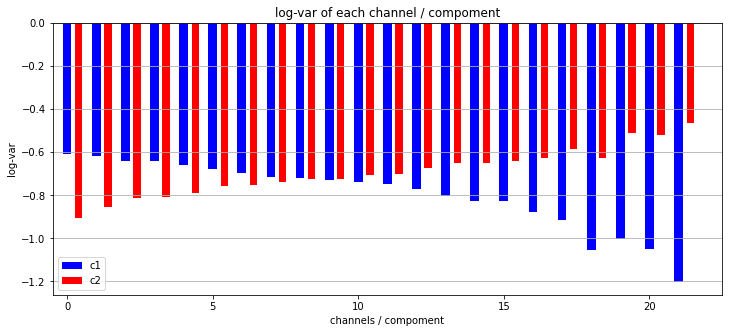

In [46]:
foot_var = mybci.logvar(csp6_foot_data)
tongue_var = mybci.logvar(csp6_tongue_data)

mybci.plot_logvar(foot_var,tongue_var)

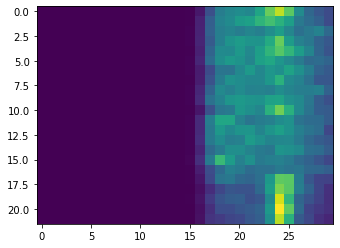

In [47]:
x = np.linspace(1,129,129)
y = np.linspace(1,22,22)
foot_psd.shape
plt.imshow(np.mean(foot_psd[:,:,0:30],axis=0))

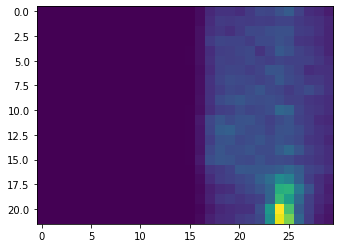

In [48]:
plt.imshow(np.mean(tongue_psd[:,:,0:30],axis=0))

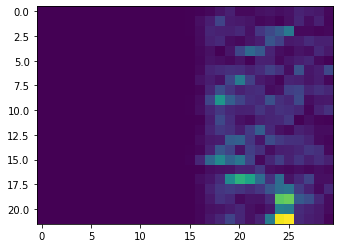

In [49]:
plt.imshow(tongue_psd[14,:,0:30])

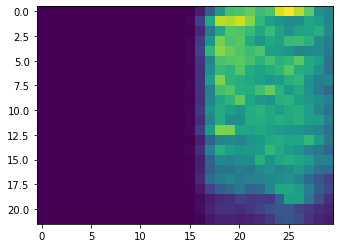

In [50]:
csp5_right_psd,freq = mybci.psd(csp5_right_data,NFFT=512,Fs=250)
csp5_tongue_psd,freq = mybci.psd(csp5_tongue_data,NFFT=512,Fs=250)
plt.imshow(np.mean(csp5_right_psd[:,:,0:30],axis=0))


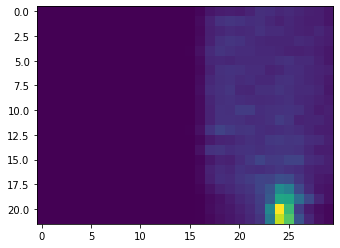

In [51]:
plt.imshow(np.mean(csp5_tongue_psd[:,:,0:30],axis=0))

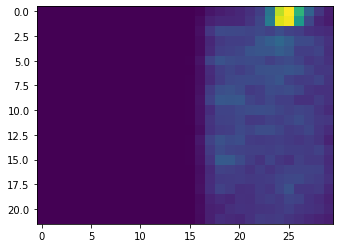

In [52]:
csp1_left_psd,freq = mybci.psd(csp1_left_data,NFFT=512,Fs=250)
csp1_right_psd,freq = mybci.psd(csp1_right_data,NFFT=512,Fs=250)
plt.imshow(np.mean(csp1_left_psd[:,:,0:30],axis=0))

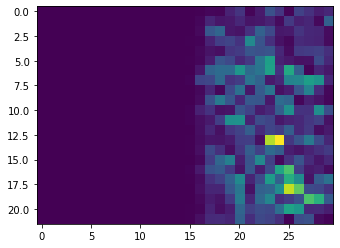

In [53]:
plt.imshow(csp1_right_psd[6,:,0:30])